# Importing basic libraries

In [1]:

import warnings as w
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
w.filterwarnings('ignore')


# Reading the data

In [2]:
df = pd.read_csv(
    r"C:\Users\harsh\College\ML-Assignments\Data Sets\MLK\mall segmentation.csv")


In [3]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [4]:
# Removing the CustomerID column as it is not required for clustering

df.drop('CustomerID', axis=1, inplace=True)


In [5]:
df.describe()


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


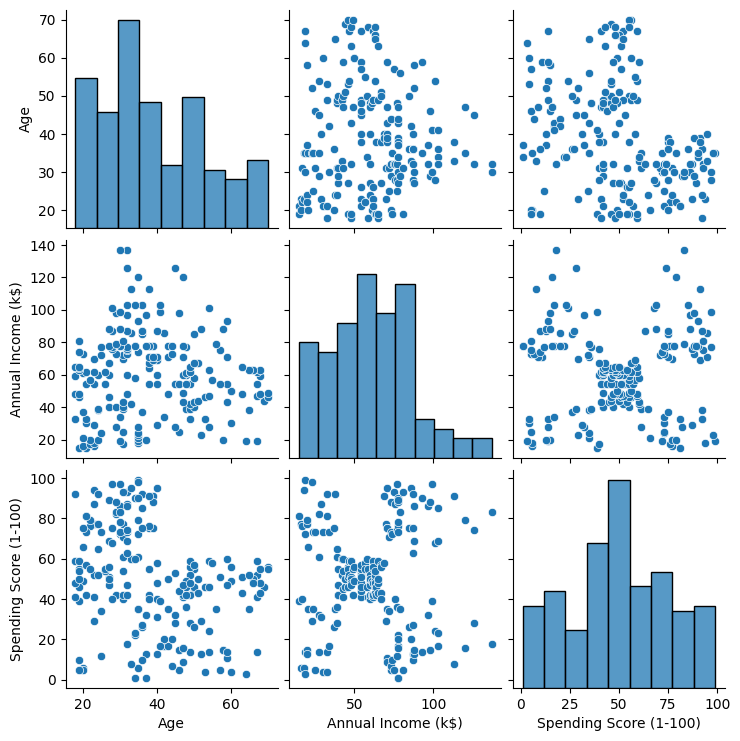

In [7]:
# Plotting the data distribution

sns.pairplot(df)


In [8]:
# Creating dummy variables for the categorical data

df = pd.get_dummies(data=df, columns=['Gender'], drop_first=True)


In [9]:
df.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


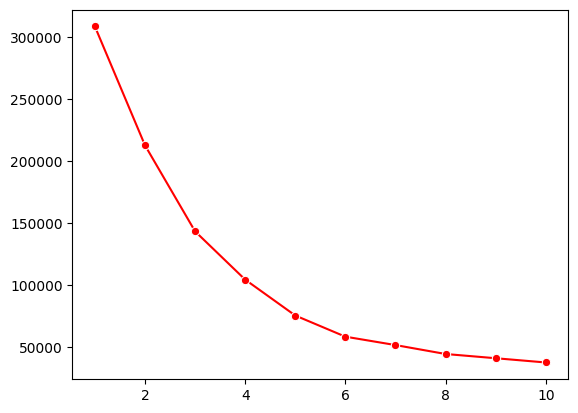

In [10]:
# Using KMeans clustering

from sklearn.cluster import KMeans

# Finding the optimal number of clusters

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    pass

sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.show()


In [11]:
# Making the KMeans model for 5 clusters

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)
df['Cluster'] = y_kmeans


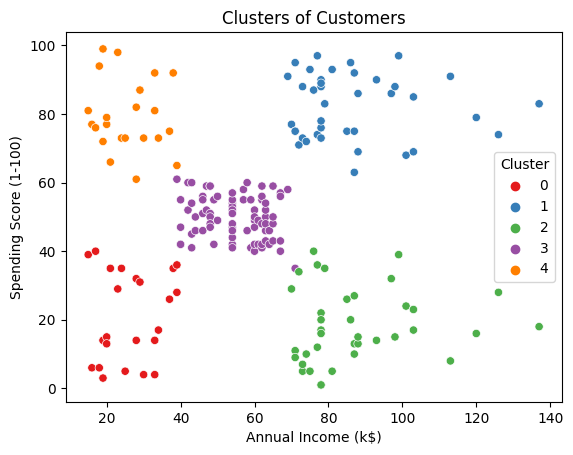

In [12]:
# Plotting the clusters

sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='Set1')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


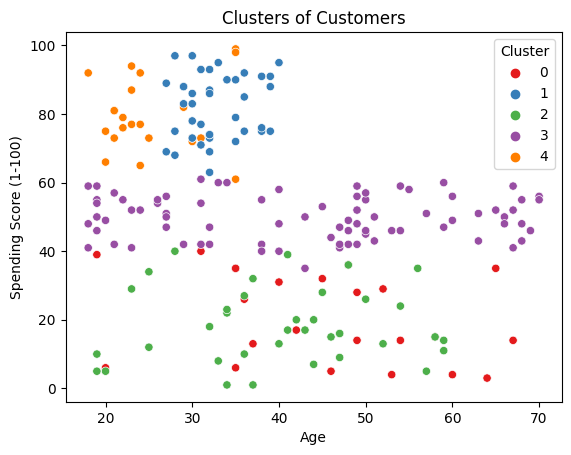

In [13]:
# Plotting the clusters for the Age and Spending Score

sns.scatterplot(x='Age', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


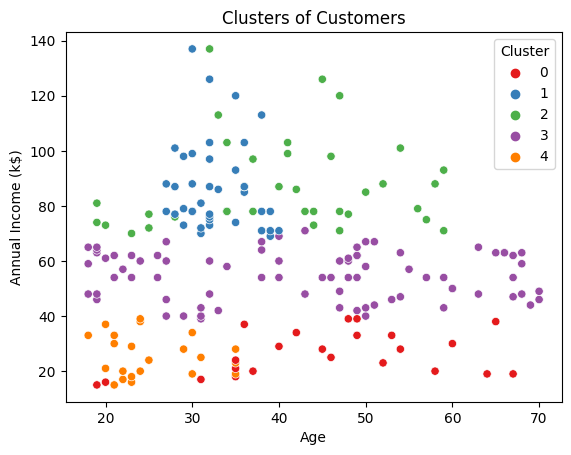

In [14]:
# Plotting the clusters for the Age and Annual Income

sns.scatterplot(x='Age', y='Annual Income (k$)',
                hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()
